<center> <img src = https://raw.githubusercontent.com/AndreyRysistov/DatasetsForPandas/main/hh%20label.jpg alt="drawing" style="width:400px;">

# <center> Проект: Анализ резюме из HeadHunter
   

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# Исследование структуры данных

1. Прочитайте данные с помощью библиотеки Pandas. Совет: перед чтением обратите внимание на разделитель внутри файла. 

In [3]:
hh_original = pd.read_csv('data/dst-3.0_16_1_hh_database.csv', sep=';')

In [4]:
#создаем копию исходной таблицы чтобы не тратить время на чтение, если что пойдет не так
hh_data = hh_original.copy()

2. Выведите несколько первых (последних) строк таблицы, чтобы убедиться в том, что ваши данные не повреждены. Ознакомьтесь с признаками и их структурой.

In [5]:
print(hh_data.head(5))
#print(hh_data.tail(5))

                                   Пол, возраст           ЗП   
0    Мужчина ,  39 лет , родился 27 ноября 1979   29000 руб.  \
1     Мужчина ,  60 лет , родился 20 марта 1959   40000 руб.   
2  Женщина ,  36 лет , родилась 12 августа 1982   20000 руб.   
3      Мужчина ,  38 лет , родился 25 июня 1980  100000 руб.   
4     Женщина ,  26 лет , родилась 3 марта 1993  140000 руб.   

                           Ищет работу на должность:   
0                            Системный администратор  \
1                               Технический писатель   
2                                           Оператор   
3  Веб-разработчик (HTML / CSS / JS / PHP / базы ...   
4                  Региональный менеджер по продажам   

                        Город, переезд, командировки   
0  Советск (Калининградская область) , не готов к...  \
1  Королев , не готов к переезду , готов к редким...   
2  Тверь , не готова к переезду , не готова к ком...   
3  Саратов , не готов к переезду , готов к редким...  

3. Выведите основную информацию о числе непустых значений в столбцах и их типах в таблице.

4. Обратите внимание на информацию о числе непустых значений.

In [6]:
# Выводим общую информацию
hh_data.info()

# Находим столбцы с ненулевым процентом пустых значений
cols_null_persent = hh_data.isnull().mean() * 100;
cols_with_null = cols_null_persent[cols_null_persent>0].sort_values(ascending=False);
print('\n Missing data in the following columns:\n{}'.format(cols_with_null));

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44744 entries, 0 to 44743
Data columns (total 12 columns):
 #   Column                           Non-Null Count  Dtype 
---  ------                           --------------  ----- 
 0   Пол, возраст                     44744 non-null  object
 1   ЗП                               44744 non-null  object
 2   Ищет работу на должность:        44744 non-null  object
 3   Город, переезд, командировки     44744 non-null  object
 4   Занятость                        44744 non-null  object
 5   График                           44744 non-null  object
 6   Опыт работы                      44576 non-null  object
 7   Последнее/нынешнее место работы  44743 non-null  object
 8   Последняя/нынешняя должность     44742 non-null  object
 9   Образование и ВУЗ                44744 non-null  object
 10  Обновление резюме                44744 non-null  object
 11  Авто                             44744 non-null  object
dtypes: object(12)
memory usage: 4.1+

5. Выведите основную статистическую информацию о столбцах.


In [7]:
display(hh_data.describe())

,"Пол, возраст",ЗП,Ищет работу на должность:,"Город, переезд, командировки",Занятость,График,Опыт работы,Последнее/нынешнее место работы,Последняя/нынешняя должность,Образование и ВУЗ,Обновление резюме,Авто
count,44744,44744,44744,44744,44744,44744,44576,44743,44742,44744,44744,44744
unique,16003,690,14929,10063,38,47,44413,30214,16927,40148,18838,2
top,"Мужчина , 32 года , родился 17 сентября 1986",50000 руб.,Системный администратор,"Москва , не готов к переезду , не готов к кома...",полная занятость,полный день,Опыт работы 10 лет 8 месяцев Апрель 2018 — по...,Индивидуальное предпринимательство / частная п...,Системный администратор,Высшее образование 1987 Военный инженерный Кра...,07.05.2019 09:50,Не указано
freq,18,4064,3099,1261,30026,22727,3,935,2062,4,25,32268


# Преобразование данных

1. Начнем с простого - с признака **"Образование и ВУЗ"**. Его текущий формат это: **<Уровень образования год выпуска ВУЗ специальность...>**. Например:
* Высшее образование 2016 Московский авиационный институт (национальный исследовательский университет)...
* Неоконченное высшее образование 2000  Балтийская государственная академия рыбопромыслового флота…
Нас будет интересовать только уровень образования.

Создайте с помощью функции-преобразования новый признак **"Образование"**, который должен иметь 4 категории: "высшее", "неоконченное высшее", "среднее специальное" и "среднее".

Выполните преобразование, ответьте на контрольные вопросы и удалите признак "Образование и ВУЗ".

Совет: обратите внимание на структуру текста в столбце **"Образование и ВУЗ"**. Гарантируется, что текущий уровень образования соискателя всегда находится в первых 2ух слов и начинается с заглавной буквы. Воспользуйтесь этим.

*Совет: проверяйте полученные категории, например, с помощью метода unique()*


In [8]:
# Создаем функцию преобразования столбца
def replace_graduation_level(grad_lev):
    grad_lev=  grad_lev.split()[0:2] 
    if 'Высшее' in grad_lev:
        return 'высшее'
    elif 'Неоконченное' in grad_lev:
        return 'неоконченное высшее'           
    elif 'Среднее' in grad_lev:
        if 'специальное' in grad_lev:
            return 'среднее специальное'
        else:
            return 'среднее'
    else:
        return grad_lev
    
# Применяем функцию и распаковываем ответ    
hh_data['Образование'] = hh_data['Образование и ВУЗ'].apply(replace_graduation_level)

# Удаляем лишний столбец
hh_data.drop(columns = ['Образование и ВУЗ'],axis = 1,inplace=True)

# Проверяем, что всё сработало как надо и в процессе не потерялись данные
hh_data.info()
# Проверяем, что всё сработало как надо
hh_data['Образование'].unique() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44744 entries, 0 to 44743
Data columns (total 12 columns):
 #   Column                           Non-Null Count  Dtype 
---  ------                           --------------  ----- 
 0   Пол, возраст                     44744 non-null  object
 1   ЗП                               44744 non-null  object
 2   Ищет работу на должность:        44744 non-null  object
 3   Город, переезд, командировки     44744 non-null  object
 4   Занятость                        44744 non-null  object
 5   График                           44744 non-null  object
 6   Опыт работы                      44576 non-null  object
 7   Последнее/нынешнее место работы  44743 non-null  object
 8   Последняя/нынешняя должность     44742 non-null  object
 9   Обновление резюме                44744 non-null  object
 10  Авто                             44744 non-null  object
 11  Образование                      44744 non-null  object
dtypes: object(12)
memory usage: 4.1+

array(['неоконченное высшее', 'высшее', 'среднее специальное', 'среднее'],
      dtype=object)

2. Теперь нас интересует столбец **"Пол, возраст"**. Сейчас он представлен в формате **<Пол , возраст , дата рождения >**. Например:
* Мужчина , 39 лет , родился 27 ноября 1979 
* Женщина , 21 год , родилась 13 января 2000
Как вы понимаете, нам необходимо выделить каждый параметр в отдельный столбец.

Создайте два новых признака **"Пол"** и **"Возраст"**. При этом важно учесть:
* Признак пола должен иметь 2 уникальных строковых значения: 'М' - мужчина, 'Ж' - женщина. 
* Признак возраста должен быть представлен целыми числами.

Выполните преобразование, ответьте на контрольные вопросы и удалите признак **"Пол, возраст"** из таблицы.

*Совет: обратите внимание на структуру текста в столбце, в части на то, как разделены параметры пола, возраста и даты рождения между собой - символом ' , '. 
Гарантируется, что структура одинакова для всех строк в таблице. Вы можете воспользоваться этим.*


In [9]:
# Создаем функцию преобразования столбца
def replace_gender_age(gender_age):
    gender_age =  gender_age.split(',')[0:2]
    return gender_age[0][0], int(gender_age[1].split(' ')[2])
    
# Применяем функцию и распаковываем ответ  
hh_data['Пол'],hh_data['Возраст'] = zip(*hh_data['Пол, возраст'].apply(replace_gender_age));

# Проверяем, что всё сработало как надо и в процессе не потерялись данные
print( hh_data.info() )
print( hh_data['Возраст'].unique() )
print( hh_data['Пол'].unique() )

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44744 entries, 0 to 44743
Data columns (total 14 columns):
 #   Column                           Non-Null Count  Dtype 
---  ------                           --------------  ----- 
 0   Пол, возраст                     44744 non-null  object
 1   ЗП                               44744 non-null  object
 2   Ищет работу на должность:        44744 non-null  object
 3   Город, переезд, командировки     44744 non-null  object
 4   Занятость                        44744 non-null  object
 5   График                           44744 non-null  object
 6   Опыт работы                      44576 non-null  object
 7   Последнее/нынешнее место работы  44743 non-null  object
 8   Последняя/нынешняя должность     44742 non-null  object
 9   Обновление резюме                44744 non-null  object
 10  Авто                             44744 non-null  object
 11  Образование                      44744 non-null  object
 12  Пол                             

In [10]:
ans = round(hh_data['Пол'].value_counts()['Ж']/len(hh_data)*100,2)
print('В данных {}% женских резюме'.format(ans))
ans = round(hh_data['Возраст'].mean(),1)
print('средний возраст соискателей {}'.format(ans))

В данных 19.07% женских резюме
средний возраст соискателей 32.2


In [11]:
# Удаляем столбец 
hh_data.drop(columns = ['Пол, возраст'],axis = 1,inplace=True)
# Проверяем, что всё сработало как надо и в процессе не потерялись данные
hh_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44744 entries, 0 to 44743
Data columns (total 13 columns):
 #   Column                           Non-Null Count  Dtype 
---  ------                           --------------  ----- 
 0   ЗП                               44744 non-null  object
 1   Ищет работу на должность:        44744 non-null  object
 2   Город, переезд, командировки     44744 non-null  object
 3   Занятость                        44744 non-null  object
 4   График                           44744 non-null  object
 5   Опыт работы                      44576 non-null  object
 6   Последнее/нынешнее место работы  44743 non-null  object
 7   Последняя/нынешняя должность     44742 non-null  object
 8   Обновление резюме                44744 non-null  object
 9   Авто                             44744 non-null  object
 10  Образование                      44744 non-null  object
 11  Пол                              44744 non-null  object
 12  Возраст                         

3. Следующим этапом преобразуем признак **"Опыт работы"**. Его текущий формат - это: **<Опыт работы: n лет m месяцев, периоды работы в различных компаниях…>**. 

Из столбца нам необходимо выделить общий опыт работы соискателя в месяцах, новый признак назовем "Опыт работы (месяц)"

Для начала обсудим условия решения задачи:
* Во-первых, в данном признаке есть пропуски. Условимся, что если мы встречаем пропуск, оставляем его как есть (функция-преобразование возвращает NaN)
* Во-вторых, в данном признаке есть скрытые пропуски. Для некоторых соискателей в столбце стоит значения "Не указано". Их тоже обозначим как NaN (функция-преобразование возвращает NaN)
* В-третьих, нас не интересует информация, которая описывается после указания опыта работы (периоды работы в различных компаниях)
* В-четвертых, у нас есть проблема: опыт работы может быть представлен только в годах или только месяцах. Например, можно встретить следующие варианты:
    * Опыт работы 3 года 2 месяца…
    * Опыт работы 4 года…
    * Опыт работы 11 месяцев…
    * Учитывайте эту особенность в вашем коде

Учитывайте эту особенность в вашем коде

В результате преобразования у вас должен получиться столбец, содержащий информацию о том, сколько месяцев проработал соискатель.
Выполните преобразование, ответьте на контрольные вопросы и удалите столбец **"Опыт работы"** из таблицы.


In [12]:
# Создаем функцию преобразования столбца

def replace_experience(experience):
    if experience in [' ', 'Не указано']: 
        return float('nan')
    elif type(experience)==float: 
        return experience
    #elif len(experience) > 5: 
    else:
        ans = experience.split(' ')
        y,m = 0,0
        if ans[3] in ['лет', 'года','год']: 
            y=float(ans[2])
            if ans[5] in ['месяцев', 'месяца','месяц']: 
                m=float(ans[4])
        elif ans[3] in ['месяцев', 'месяца','месяц']: 
            m=float(ans[2])
        return float(y*12 + m)
    #else:
    #    print( 'not expected' )
    #    return experience

    
    
# Применяем функцию и распаковываем ответ  
hh_data['Опыт работы (месяц)'] = hh_data['Опыт работы'].apply(replace_experience)

# Проверяем, что всё сработало как надо и в процессе не потерялись данные
hh_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44744 entries, 0 to 44743
Data columns (total 14 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   ЗП                               44744 non-null  object 
 1   Ищет работу на должность:        44744 non-null  object 
 2   Город, переезд, командировки     44744 non-null  object 
 3   Занятость                        44744 non-null  object 
 4   График                           44744 non-null  object 
 5   Опыт работы                      44576 non-null  object 
 6   Последнее/нынешнее место работы  44743 non-null  object 
 7   Последняя/нынешняя должность     44742 non-null  object 
 8   Обновление резюме                44744 non-null  object 
 9   Авто                             44744 non-null  object 
 10  Образование                      44744 non-null  object 
 11  Пол                              44744 non-null  object 
 12  Возраст           

In [13]:
# Удаляем столбец 
hh_data.drop(columns = ['Опыт работы'],axis = 1,inplace=True)
# Проверяем, что всё сработало как надо и в процессе не потерялись данные
hh_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44744 entries, 0 to 44743
Data columns (total 13 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   ЗП                               44744 non-null  object 
 1   Ищет работу на должность:        44744 non-null  object 
 2   Город, переезд, командировки     44744 non-null  object 
 3   Занятость                        44744 non-null  object 
 4   График                           44744 non-null  object 
 5   Последнее/нынешнее место работы  44743 non-null  object 
 6   Последняя/нынешняя должность     44742 non-null  object 
 7   Обновление резюме                44744 non-null  object 
 8   Авто                             44744 non-null  object 
 9   Образование                      44744 non-null  object 
 10  Пол                              44744 non-null  object 
 11  Возраст                          44744 non-null  int64  
 12  Опыт работы (месяц

In [14]:
hh_data['Опыт работы (месяц)'].median()

100.0

4. Хорошо идем! Следующий на очереди признак "Город, переезд, командировки". Информация в нем представлена в следующем виде: **<Город , (метро) , готовность к переезду (города для переезда) , готовность к командировкам>**. В скобках указаны необязательные параметры строки. Например, можно встретить следующие варианты:

* Москва , не готов к переезду , готов к командировкам
* Москва , м. Беломорская , не готов к переезду, не готов к командировкам
* Воронеж , готов к переезду (Сочи, Москва, Санкт-Петербург) , готов к командировкам

Создадим отдельные признаки **"Город"**, **"Готовность к переезду"**, **"Готовность к командировкам"**. При этом важно учесть:

* Признак **"Город"** должен содержать только 4 категории: "Москва", "Санкт-Петербург" и "город-миллионник" (их список ниже), остальные обозначьте как "другие".

    Список городов-миллионников:
    
   <code>million_cities = ['Новосибирск', 'Екатеринбург','Нижний Новгород','Казань', 'Челябинск','Омск', 'Самара', 'Ростов-на-Дону', 'Уфа', 'Красноярск', 'Пермь', 'Воронеж','Волгоград']
    </code>
    Инфорация о метро, рядом с которым проживает соискатель нас не интересует.
* Признак **"Готовность к переезду"** должен иметь два возможных варианта: True или False. Обратите внимание, что возможны несколько вариантов описания готовности к переезду в признаке "Город, переезд, командировки". Например:
    * … , готов к переезду , …
    * … , не готова к переезду , …
    * … , готова к переезду (Москва, Санкт-Петербург, Ростов-на-Дону)
    * … , хочу переехать (США) , …
    
    Нас интересует только сам факт возможности или желания переезда.
* Признак **"Готовность к командировкам"** должен иметь два возможных варианта: True или False. Обратите внимание, что возможны несколько вариантов описания готовности к командировкам в признаке "Город, переезд, командировки". Например:
    * … , готов к командировкам , … 
    * … , готова к редким командировкам , …
    * … , не готов к командировкам , …
    
    Нас интересует только сам факт готовности к командировке.
    
    Еще один важный факт: при выгрузки данных у некоторых соискателей "потерялась" информация о готовности к командировкам. Давайте по умолчанию будем считать, что такие соискатели не готовы к командировкам.
    
Выполните преобразования и удалите столбец **"Город, переезд, командировки"** из таблицы.

*Совет: обратите внимание на то, что структура текста может меняться в зависимости от указания ближайшего метро. Учите это, если будете использовать порядок слов в своей программе.*


In [15]:
# Создаем функцию преобразования столбца
million_cities = ['Новосибирск', 'Екатеринбург','НижнийНовгород','Казань', 'Челябинск','Омск', 'Самара', 'Ростов-на-Дону', 'Уфа', 'Красноярск', 'Пермь', 'Воронеж','Волгоград']

def replace_city( data ):
    # Задаем дефолтные значения выходных данных
    city, moving, business_trips = 'другие', True,True
    
    # Находим индекс первой буквы фразы 'к переезд' 
    ind = data.find('к переезд')
    # Проверяем наличие отрицания готовносто до и после этой фразы
    if ind == -1:
        business_trips = data[ind+10:].find('не готов') == -1
    else:
        moving = data[:ind].find('не готов') == -1
        business_trips= data[ind+10:].find('не готов') == -1
        
    # Преобразовываем входные данные в набор слов и классифицируем по первому слову
    data = data.split(',')
    # Удаляем мешающие пробелы
    data[0]=data[0].replace(' ','')
    if data[0] in ["Москва", "Санкт-Петербург"]:
        city = data[0]
    elif data[0] in million_cities:
        city = "город-миллионник"
   
    return city, moving, business_trips    
    
# Применяем функцию и распаковываем ответ  
hh_data['Город'],hh_data['Готовность к переезду'],hh_data['Готовность к командировкам'] = zip( *hh_data['Город, переезд, командировки'].apply(replace_city) )

# Проверяем, что всё сработало как надо 
display(hh_data['Город, переезд, командировки'].head())
hh_data[['Город', 'Готовность к переезду', 'Готовность к командировкам']].head()

0    Советск (Калининградская область) , не готов к...
1    Королев , не готов к переезду , готов к редким...
2    Тверь , не готова к переезду , не готова к ком...
3    Саратов , не готов к переезду , готов к редким...
4    Москва , не готова к переезду , готова к коман...
Name: Город, переезд, командировки, dtype: object

,Город,Готовность к переезду,Готовность к командировкам
0,другие,False,False
1,другие,False,True
2,другие,False,False
3,другие,False,True
4,Москва,False,True


In [16]:
# Удаляем столбец 
hh_data.drop(columns = ['Город, переезд, командировки'],axis = 1,inplace=True)
# Проверяем, что всё сработало как надо и в процессе не потерялись данные
hh_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44744 entries, 0 to 44743
Data columns (total 15 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   ЗП                               44744 non-null  object 
 1   Ищет работу на должность:        44744 non-null  object 
 2   Занятость                        44744 non-null  object 
 3   График                           44744 non-null  object 
 4   Последнее/нынешнее место работы  44743 non-null  object 
 5   Последняя/нынешняя должность     44742 non-null  object 
 6   Обновление резюме                44744 non-null  object 
 7   Авто                             44744 non-null  object 
 8   Образование                      44744 non-null  object 
 9   Пол                              44744 non-null  object 
 10  Возраст                          44744 non-null  int64  
 11  Опыт работы (месяц)              44574 non-null  float64
 12  Город             

In [17]:
# Ответы на контрольные вопросы
ans = round(hh_data['Город'].value_counts()['Санкт-Петербург']/len(hh_data)*100)
print('В данных {}% резюме из Санкт-Петербурга'.format(ans))
# Создаем маски
mask1 = hh_data['Готовность к переезду']==True
mask2 = hh_data['Готовность к командировкам']==True

ans = round(hh_data[mask1 & mask2].shape[0]/len(hh_data)*100)
print('{} кандидата готовы и к командировкам и переезду'.format(ans))

В данных 11% резюме из Санкт-Петербурга
32 кандидата готовы и к командировкам и переезду


5. Рассмотрим поближе признаки **"Занятость"** и **"График"**. Сейчас признаки представляют собой набор категорий желаемой занятости (полная занятость, частичная занятость, проектная работа, волонтерство, стажировка) и желаемого графика работы (полный день, сменный график, гибкий график, удаленная работа, вахтовый метод).
На сайте hh.ru соискатель может указывать различные комбинации данных категорий, например:
* полная занятость, частичная занятость
* частичная занятость, проектная работа, волонтерство
* полный день, удаленная работа
* вахтовый метод, гибкий график, удаленная работа, полная занятость

Такой вариант признаков имеет множество различных комбинаций, а значит множество уникальных значений, что мешает анализу. Нужно это исправить!

Давайте создадим признаки-мигалки для каждой категории: если категория присутствует в списке желаемых соискателем, то в столбце на месте строки рассматриваемого соискателя ставится True, иначе - False.

Такой метод преобразования категориальных признаков называется One Hot Encoding и его схема представлена на рисунке ниже:
<img src=https://raw.githubusercontent.com/AndreyRysistov/DatasetsForPandas/main/ohe.jpg>
Выполните данное преобразование для признаков "Занятость" и "График", ответьте на контрольные вопросы, после чего удалите их из таблицы

In [18]:
# Создаем списки интересующих признаков
occupation = ['полная занятость', 'частичная занятость', 'проектная работа', 'волонтерство', 'стажировка']
workingtime= ['полный день', "сменный график", "гибкий график", "удаленная работа", "вахтовый метод"]
'''
def fill_columns( data, column_set ):   
    ans = np.zeros(len(column_set)) 
    for i in range(len(column_set)):
        ans[i] = data.find(column_set[i]) != -1
    return ans==1
'''
# Создаем функцию вычленеия признака
def fill_columns( data, name ):   
    return data.find(name) != -1

# Ищем признак в соответствующем столбце
for col in occupation:
    hh_data[col] = hh_data['Занятость'].apply( lambda x: fill_columns(x, col) )

for col in workingtime:
    hh_data[col] = hh_data['График'].apply( lambda x: fill_columns(x, col) )
    
#hh_data0['полная занятость'],hh_data0['частичная занятость'],hh_data0[ 'проектная работа'],hh_data0[ 'волонтерство'],hh_data0['стажировка'] = zip(*hh_data0['Занятость'].apply( lambda x: fill_columns(x, occupation) ))
#fill_columns('вахтовый метод, гибкий график, удаленная работа, полная занятость','гикий график')

In [19]:
# Удаляем лишние теперь столбцы 
hh_data.drop(columns = ['Занятость','График'],axis = 1,inplace=True)

# Проверяем, что всё сработало как надо и в процессе не потерялись данные
hh_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44744 entries, 0 to 44743
Data columns (total 23 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   ЗП                               44744 non-null  object 
 1   Ищет работу на должность:        44744 non-null  object 
 2   Последнее/нынешнее место работы  44743 non-null  object 
 3   Последняя/нынешняя должность     44742 non-null  object 
 4   Обновление резюме                44744 non-null  object 
 5   Авто                             44744 non-null  object 
 6   Образование                      44744 non-null  object 
 7   Пол                              44744 non-null  object 
 8   Возраст                          44744 non-null  int64  
 9   Опыт работы (месяц)              44574 non-null  float64
 10  Город                            44744 non-null  object 
 11  Готовность к переезду            44744 non-null  bool   
 12  Готовность к коман

In [20]:
# Ответы на контрольные вопросы

# Создаем маски
mask1 = hh_data['проектная работа']==True
mask2 = hh_data['волонтерство']==True
# Печатаем ответ
ans = hh_data[mask1 & mask2].shape[0]
print('{} людей ищут проектную работу и волонтёрство.'.format(ans))
# Создаем маски
mask1 = hh_data["гибкий график"]==True
mask2 = hh_data["вахтовый метод"]==True
# Печатаем ответ
ans=hh_data[mask1 & mask2].shape[0]
print('{} людей хотят работать вахтовым методом и с гибким графиком.'.format(ans))


436 людей ищут проектную работу и волонтёрство.
2311 людей хотят работать вахтовым методом и с гибким графиком.


6. (2 балла) Наконец, мы добрались до самого главного и самого важного - признака заработной платы **"ЗП"**. 
В чем наша беда? В том, что помимо желаемой заработной платы соискатель указывает валюту, в которой он бы хотел ее получать, например:
* 30000 руб.
* 50000 грн.
* 550 USD

Нам бы хотелось видеть заработную плату в единой валюте, например, в рублях. Возникает вопрос, а где взять курс валют по отношению к рублю?

На самом деле язык Python имеет в арсенале огромное количество возможностей получения данной информации, от обращения к API Центробанка, до использования специальных библиотек, например pycbrf. Однако, это не тема нашего проекта.

Поэтому мы пойдем в лоб: обратимся к специальным интернет-ресурсам для получения данных о курсе в виде текстовых файлов. Например, MDF.RU, данный ресурс позволяет удобно экспортировать данные о курсах различных валют и акций за указанные периоды в виде csv файлов. Мы уже сделали выгрузку курсов валют, которые встречаются в наших данных за период с 29.12.2017 по 05.12.2019. Скачать ее вы можете **на платформе**

Создайте новый DataFrame из полученного файла. В полученной таблице нас будут интересовать столбцы:
* "currency" - наименование валюты в ISO кодировке,
* "date" - дата, 
* "proportion" - пропорция, 
* "close" - цена закрытия (последний зафиксированный курс валюты на указанный день).


Перед вами таблица соответствия наименований иностранных валют в наших данных и их общепринятых сокращений, которые представлены в нашем файле с курсами валют. Пропорция - это число, за сколько единиц валюты указан курс в таблице с курсами. Например, для казахстанского тенге курс на 20.08.2019 составляет 17.197 руб. за 100 тенге, тогда итоговый курс равен - 17.197 / 100 = 0.17197 руб за 1 тенге.
Воспользуйтесь этой информацией в ваших преобразованиях.

<img src=https://raw.githubusercontent.com/AndreyRysistov/DatasetsForPandas/main/table.jpg>


Осталось только понять, откуда брать дату, по которой определяется курс? А вот же она - в признаке **"Обновление резюме"**, в нем содержится дата и время, когда соискатель выложил текущий вариант своего резюме. Нас интересует только дата, по ней бы и будем сопоставлять курсы валют.

Теперь у нас есть вся необходимая информация для того, чтобы создать признак "ЗП (руб)" - заработная плата в рублях.

После ответа на контрольные вопросы удалите исходный столбец заработной платы "ЗП" и все промежуточные столбцы, если вы их создавали.

Итак, давайте обсудим возможный алгоритм преобразования: 
1. Перевести признак "Обновление резюме" из таблицы с резюме в формат datetime и достать из него дату. В тот же формат привести признак "date" из таблицы с валютами.
2. Выделить из столбца "ЗП" сумму желаемой заработной платы и наименование валюты, в которой она исчисляется. Наименование валюты перевести в стандарт ISO согласно с таблицей выше.
3. Присоединить к таблице с резюме таблицу с курсами по столбцам с датой и названием валюты (подумайте, какой тип объединения надо выбрать, чтобы в таблице с резюме сохранились данные о заработной плате, изначально представленной в рублях). Значение close для рубля заполнить единицей 1 (курс рубля самого к себе)
4. Умножить сумму желаемой заработной платы на присоединенный курс валюты (close) и разделить на пропорцию (обратите внимание на пропуски после объединения в этих столбцах), результат занести в новый столбец "ЗП (руб)".


In [21]:
# Сохраняем оригинал на всякий случай
hh_save = hh_data.copy()

In [22]:
#  Загружаем выгрузку курсов валют

mdf = pd.read_csv('data/ExchangeRates.csv')
mdf['date']=pd.to_datetime(mdf['date'], format = '%d/%m/%y').dt.date #.dt.strftime('%d/%m/%Y') 
mdf.head()

,currency,per,date,time,close,vol,proportion
0,USD,D,2017-12-29,00:00,57.6291,0,1
1,USD,D,2017-12-30,00:00,57.6002,0,1
2,USD,D,2017-12-31,00:00,57.6002,0,1
3,USD,D,2018-01-01,00:00,57.6002,0,1
4,USD,D,2018-01-02,00:00,57.6002,0,1


In [23]:
# Переводим "Обновление резюме" в формат datetime и выделяем из него дату
hh_data['Обновление резюме'] = pd.to_datetime(hh_data['Обновление резюме'], format = '%d.%m.%Y %H:%M').dt.date
hh_data.head()


# Создаем ISO словарь валют  
dictISO = {'руб' : 'RUB', 'грн' : 'UAH', 'USD' : 'USD', 'EUR' : 'EUR', 'белруб': 'BYN', 
           'KGS' :'KGS',  'сум' : 'UZS', 'AZN' : 'AZN', 'KZT' : 'KZT'};

# Создаем функцию конвертации валют  
def zp_rub(data):
    date=data['Обновление резюме']
    data=data['ЗП']
    data = data.split(' ');
    data[1]= dictISO[ data[1].replace('.','') ]
    # Рубли конвертировать не надо
    if data[1]=='RUB': 
        return float(data[0])
    # Для остальных преобразуем
    else:
        mask0 = mdf['date']==date
        mask1 = mdf['currency']==data[1]
        converter = mdf[ mask0 & mask1 ]
        if converter.empty: print('WARN')
        xx=converter['close']/converter['proportion']
        return float(data[0])*xx.iloc[0]

# Применяем функцию к столбцам 
hh_data['ЗП (руб)']=hh_data[['ЗП','Обновление резюме']].apply(zp_rub, axis=1)#.tail(10)

# Удаляем лишний столбец 
hh_data.drop(columns = ['ЗП'],axis = 1,inplace=True)

# Проверяем, что всё сработало как надо и в процессе не потерялись данные
hh_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44744 entries, 0 to 44743
Data columns (total 23 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Ищет работу на должность:        44744 non-null  object 
 1   Последнее/нынешнее место работы  44743 non-null  object 
 2   Последняя/нынешняя должность     44742 non-null  object 
 3   Обновление резюме                44744 non-null  object 
 4   Авто                             44744 non-null  object 
 5   Образование                      44744 non-null  object 
 6   Пол                              44744 non-null  object 
 7   Возраст                          44744 non-null  int64  
 8   Опыт работы (месяц)              44574 non-null  float64
 9   Город                            44744 non-null  object 
 10  Готовность к переезду            44744 non-null  bool   
 11  Готовность к командировкам       44744 non-null  bool   
 12  полная занятость  

In [24]:

hh_data['ЗП (руб)'].median()

59019.0

# Исследование зависимостей в данных

1. Постройте распределение признака **"Возраст"**. Опишите распределение, отвечая на следующие вопросы: чему равна мода распределения, каковы предельные значения признака, в каком примерном интервале находится возраст большинства соискателей? Есть ли аномалии для признака возраста, какие значения вы бы причислили к их числу?
*Совет: постройте гистограмму и коробчатую диаграмму рядом.*

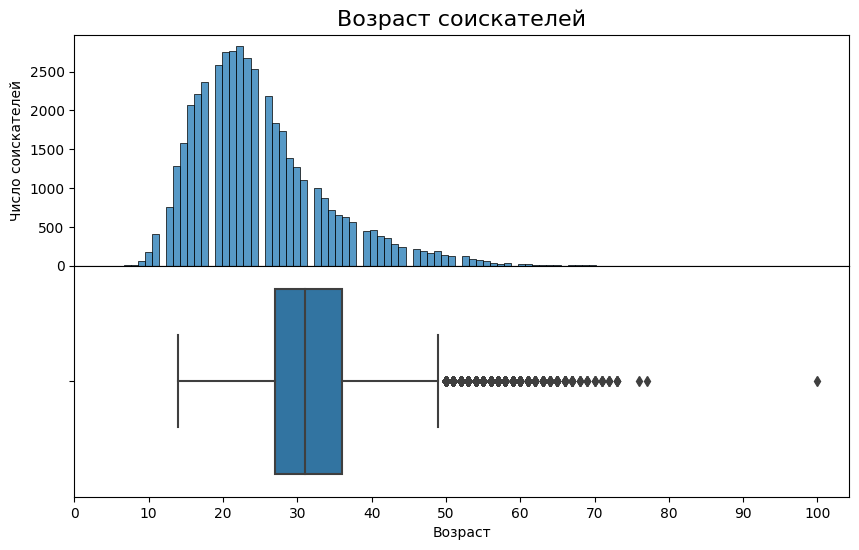

In [25]:
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(10, 6))
plt.subplots_adjust(hspace=.0)

histplot = sns.histplot(
    data=hh_data, 
    x='Возраст', 
    bins=100,
    ax=axes[0],
)
histplot.set_title('Возраст соискателей', fontsize=16)
#histplot.set_xlabel('Цена объекта (млн. австралийских долларов)')
histplot.set_ylabel('Число соискателей')

boxplot = sns.boxplot(data=hh_data, 
                      x='Возраст',
                      #grid='on',
                      #xticks = np.arange(0, 100, 20)
                      )
boxplot.set_xticks(np.arange(0, 110, 10))

#boxplot.set_title('Boxplot для возраста пользователей приложения CitiBike', fontsize=16)
boxplot.set_xlabel('Возраст');
#boxplot.set_ylabel('Тип пользователя');

In [26]:
hh_data['Возраст'].median()

31.0

По графикам возраста соискателей можно увидеть, что мода распределения находится в районе 31 года. 

Предельные значения возраста соискателей - нижняя и верхняя квантиль - распологаются на отметках 13 и 48 лет.

Возраст большинства соискателей распологается в интервале 26-38 лет. 

Также можно заметить некоторое количество аномалий: например возраст соискателя 100 лет. Это значение лучше заменить медианным возрастом.
Остальные выбросы распологаются в интервале 50-78 лет и в принципе вполне могут быть действительным возрастом соискателя.

2. Постройте распределение признака **"Опыт работы (месяц)"**. Опишите данное распределение, отвечая на следующие вопросы: чему равна мода распределения, каковы предельные значения признака, в каком примерном интервале находится опыт работы большинства соискателей? Есть ли аномалии для признака опыта работы, какие значения вы бы причислили к их числу?
*Совет: постройте гистограмму и коробчатую диаграмму рядом.*

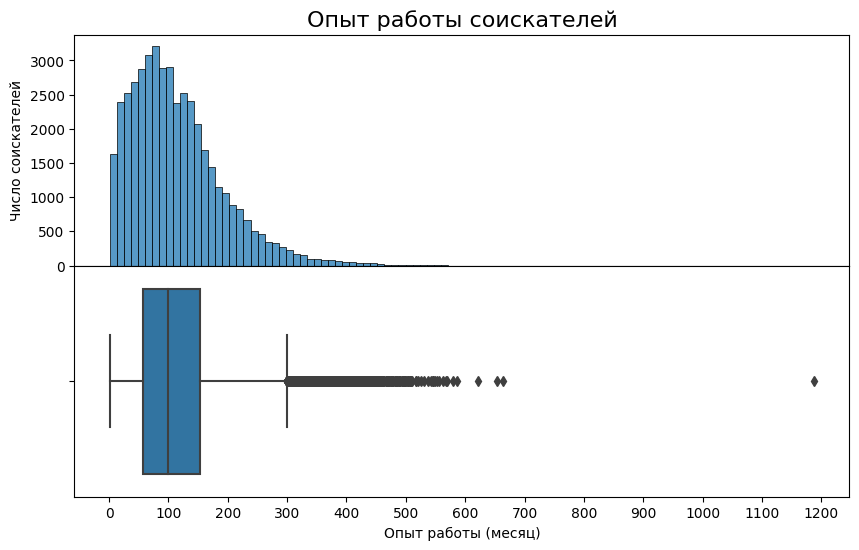

In [27]:
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(10, 6))
plt.subplots_adjust(hspace=.0)

histplot = sns.histplot(
    data=hh_data, 
    x='Опыт работы (месяц)', 
    bins=100,
    ax=axes[0],
)
histplot.set_title('Опыт работы соискателей', fontsize=16)
#histplot.set_xlabel('Цена объекта (млн. австралийских долларов)')
histplot.set_ylabel('Число соискателей')

boxplot = sns.boxplot(data=hh_data, x='Опыт работы (месяц)')
boxplot.set_xticks(np.arange(0, 1210, 100))
boxplot.set_xlabel('Опыт работы (месяц)');
#boxplot.set_ylabel('Тип пользователя');

In [28]:
print('600 месяцев  = {} лет'.format(600/12))
#hh_data['Опыт работы (месяц)'].median()

600 месяцев  = 50.0 лет


По графикам можно увидеть, что мода распределения находится на отметке 100 месяцев.

Предельные значения возраста соискателей - нижняя и верхняя квантиль - распологаются на отметках 0 и 300 месяцев.

Опыт большинства соискателей лежит в интервале 50-160 месяцев. 

Также можно заметить некоторое количество аномалий: например опыт соискателя 1200 месяцев (100 лет). Такого быть не может и это значение лучше заменить медианным значением.
Так же кажется маловероятным опыт более 60 лет. Так что значения 600+ можно тоже заменить на медианные.
Остальные выбросы распологаются в интервале 300-600 месяцев (25-50 лет) и в принципе вполне могут быть действительным опытом соискателя.

3. Постройте распределение признака **"ЗП (руб)"**. Опишите данное распределение, отвечая на следующие вопросы: каковы предельные значения признака, в каком примерном интервале находится заработная плата большинства соискателей? Есть ли аномалии для признака? Обратите внимание на гигантские размеры желаемой заработной платы.
*Совет: постройте гистограмму и коробчатую диаграмму рядом.*


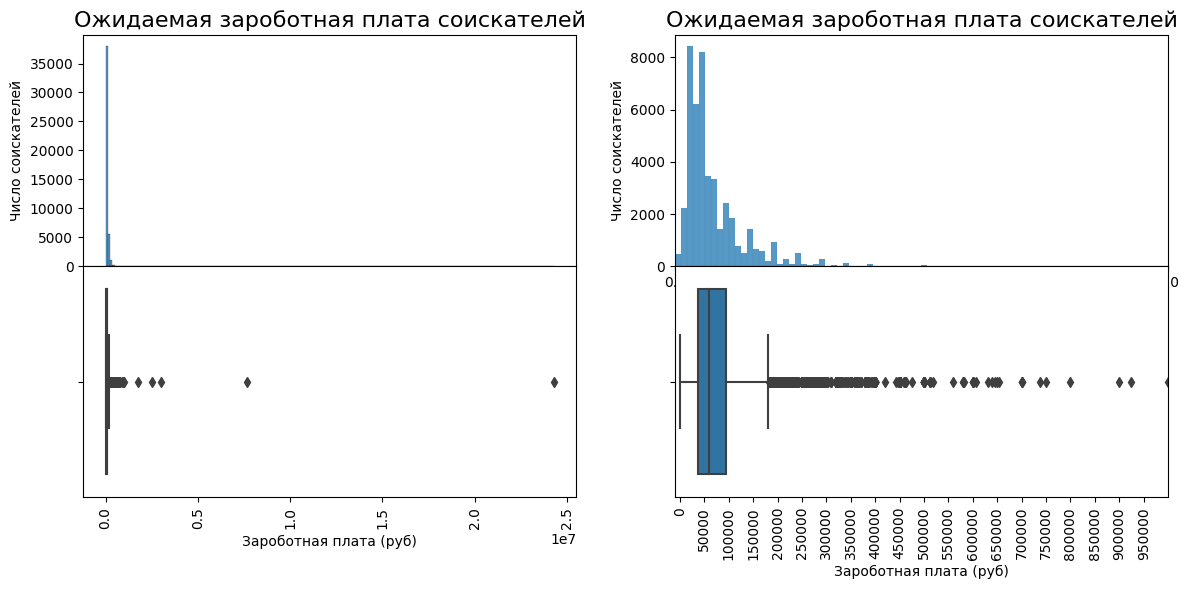

In [29]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(14, 6))
plt.subplots_adjust(hspace=.0)

histplot = sns.histplot(
    data=hh_data, 
    x='ЗП (руб)', 
    bins=200,
    ax=axes[0,0],
)
histplot.set_title('Ожидаемая зароботная плата соискателей', fontsize=16)
histplot.set_ylabel('Число соискателей')

boxplot = sns.boxplot(data=hh_data, x='ЗП (руб)',ax=axes[1,0])
boxplot.set_xlabel('Зароботная плата (руб)');
boxplot.tick_params(axis='x', labelrotation=90)

histplot = sns.histplot(
    data=hh_data, 
    x='ЗП (руб)', 
    bins=2000,
    ax=axes[0,1],
)
histplot.set_title('Ожидаемая зароботная плата соискателей', fontsize=16)
histplot.set_ylabel('Число соискателей')
histplot.set(xlim=(-0000, 1e6))


boxplot = sns.boxplot(data=hh_data, x='ЗП (руб)',ax=axes[1,1])
boxplot.set_xlabel('Зароботная плата (руб)');
boxplot.set(xlim=(-10000, 1e6));
boxplot.set_xticks(np.arange(0, 1e6, 5e4));
boxplot.tick_params(axis='x', labelrotation=90)

По получившимся графикам трудно проводить анализ из-за некоторого количества нереалистичных запросов в данных, и необходимо отбросить их. 
Так становится видно, что предельные значения зарплат - от 0 до 170 000 рублейю 

Примерный интервал заработной платы большинства соискателей 48 - 100 тысяч рублей.

К аномалиям относятся зарплаты более миллиона рублей. 

Я точно не знаю, но мне кажется, что люди, которые могут претендовать на зарплату более миллиона рублей, уже имеют соответствующую репутацию в соответствующих кругах, и не станут соискать работу через сайты по поиску работ. Если соискатель не серьезно относится к своему резюме, можно выкинуть его данные из нашей базы данных, так как мы не можем доверять предоставленной информации. С другой стороны, это может быть простой опечаткой, тогда лучше заменить значение медианным. 

Если эти же пользователи являются причиной выбросов по признаку возраста и опыта, то их данные лучше выбросить. 

4. Постройте диаграмму, которая показывает зависимость **медианной** желаемой заработной платы (**"ЗП (руб)"**) от уровня образования (**"Образование"**). Используйте для диаграммы данные о резюме, где желаемая заработная плата меньше 1 млн рублей.
*Сделайте выводы по представленной диаграмме: для каких уровней образования наблюдаются наибольшие и наименьшие уровни желаемой заработной платы? Как вы считаете, важен ли признак уровня образования при прогнозировании заработной платы?*

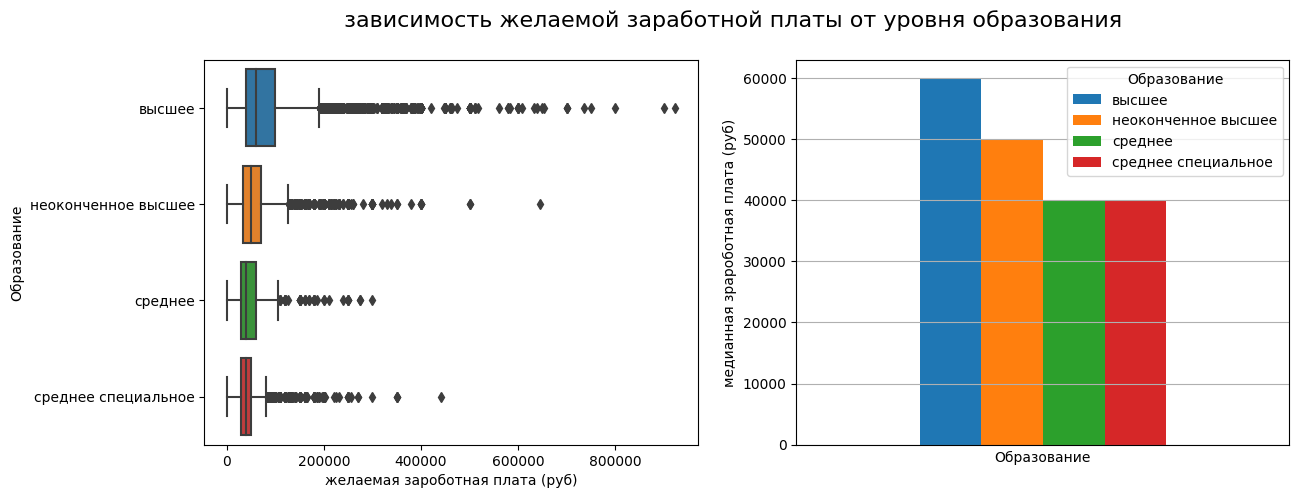

In [30]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14, 5))
plt.subplots_adjust(hspace=.5)

hh_df = hh_data[hh_data['ЗП (руб)']<1e6];

boxplot = sns.boxplot(data=hh_df,
                      x='ЗП (руб)',
                      y='Образование',
                      order=['высшее', 'неоконченное высшее', 'среднее','среднее специальное'],
                      ax = axes[0])
#boxplot.set_title(' зависимость желаемой заработной платы от уровня образования', fontsize=16)
boxplot.set_xlabel('желаемая зароботная плата (руб)')
boxplot.set_ylabel('Образование');


hh_df = pd.pivot_table( hh_df, values=['ЗП (руб)'], columns=['Образование'], aggfunc=np.median)

barplot = hh_df.plot.bar(rot=0,
        xticks=[],
        grid='on',
        ax = axes[1])

fig.suptitle(' зависимость желаемой заработной платы от уровня образования', fontsize=16)
barplot.set_ylabel('медианная зpароботная плата (руб)')
barplot.set_xlabel('Образование');

Для Высшего уровня образования наблюдаются наибольшие ожидания от заработной платы, медианное значение 60 тысяч рублей. 
Наименьшие уровни желаемой заработной платы наблюдаются для среднего и специального среднего образования, медианное значение 40 тысяч рублей.

При прогнозировании заработной платы важно учитывать уровень образования , но в связке с опытом работы, так как вполне возможно, что человек без высшего образования, но с несколькими годами опыта работы в своей области будет более подуктивен, чем человек с высшим образованием, но без опыта. 

С другой стороны, при прочих равных, можно ожидать, что люди с высшим образованием скорее всего будут хорошими работниками, инициативными и любящими учится новому. 

5. Постройте диаграмму, которая показывает распределение желаемой заработной платы (**"ЗП (руб)"**) в зависимости от города (**"Город"**). Используйте для диаграммы данные о резюме, где желая заработная плата меньше 1 млн рублей.
*Сделайте выводы по полученной диаграмме: как соотносятся медианные уровни желаемой заработной платы и их размах в городах? Как вы считаете, важен ли признак города при прогнозировании заработной платы?*

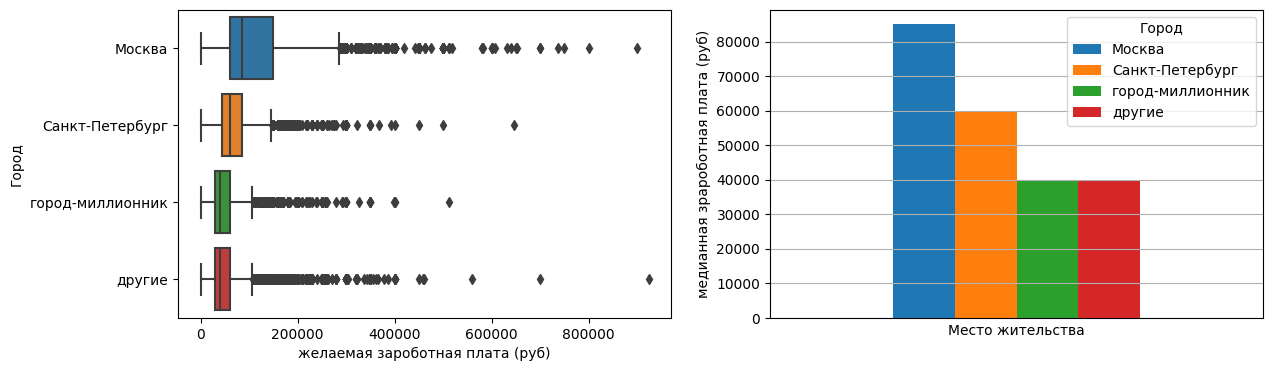

<Figure size 1000x500 with 0 Axes>

In [31]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14, 4));
plt.subplots_adjust(hspace=.5);

hh_df = hh_data[hh_data['ЗП (руб)']<1e6];

boxplot = sns.boxplot(data=hh_df,
                      x='ЗП (руб)',
                      y='Город',
                      order=['Москва', 'Санкт-Петербург', 'город-миллионник','другие'],
                      ax = axes[0]);
#boxplot.set_title(' зависимость желаемой заработной платы от уровня образования', fontsize=16)
boxplot.set_xlabel('желаемая зароботная плата (руб)');
boxplot.set_ylabel('Город');


hh_df = hh_data[hh_data['ЗП (руб)']<1e6];
hh_df = pd.pivot_table( hh_df, values=['ЗП (руб)'], columns=['Город'], aggfunc=np.median);

fig = plt.figure(figsize=(10, 5));
barplot = hh_df.plot.bar(rot=0,
        grid='on',
        xticks=[],
        ax = axes[1]
        );

fig.suptitle(' зависимость желаемой заработной платы места жительства от уровня образования', fontsize=16);
barplot.set_ylabel('медианная зpароботная плата (руб)');
barplot.set_xlabel('Место жительства');

Медианные уровни желаемой заработной платы прямопропорцональны размаху городов. Это вполне обосновано, так как проживание в больших городах обычно дороже, чем в небольших.
Безусловно, признак города выжен при прогнозировании заработной платы для позиций не подразумевающих работы удаленно.

6. Постройте **многоуровневую столбчатую диаграмму**, которая показывает зависимость медианной заработной платы (**"ЗП (руб)"**) от признаков **"Готовность к переезду"** и **"Готовность к командировкам"**. Проанализируйте график, сравнив уровень заработной платы в категориях.

In [32]:
hh_df

Город,Москва,Санкт-Петербург,город-миллионник,другие
ЗП (руб),85000.0,60000.0,40000.0,40000.0


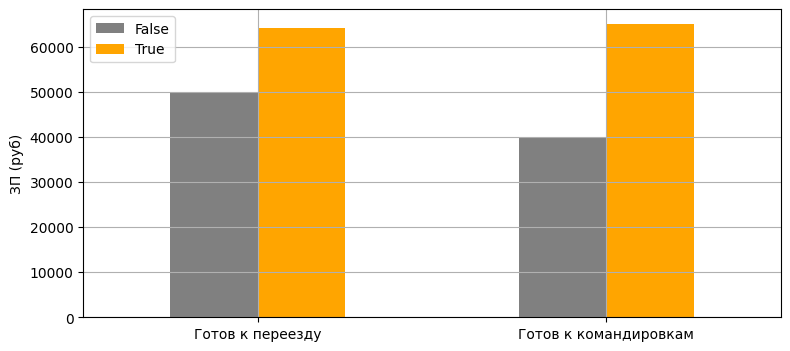

In [33]:
hh_df = hh_data[hh_data['ЗП (руб)']<1e6];
#hh_df = pd.pivot_table( hh_df, values=['ЗП (руб)'], columns=['Готовность к переезду','Готовность к командировкам'], aggfunc=np.median);
m1 = hh_df['Готовность к переезду']==True
m2 = hh_df['Готовность к командировкам']==True
# Применяем маски и группируем по признаку "Активный клиент"
hh_df = pd.DataFrame({
    'Готов к переезду': hh_df.groupby('Готовность к переезду')['ЗП (руб)'].median(),
    'Готов к командировкам': hh_df.groupby('Готовность к командировкам')['ЗП (руб)'].median()
                   })

p = hh_df.transpose().plot.bar(rot=0,
        figsize=[9,4],
        color=['Grey','Orange'],
        ylabel='ЗП (руб)',
        grid='on',
        );

Люди, готовые к командировкам и переезду в среднем ожидают более высокую зароботную плату. Для них работа на данном этапе жизни находится в приоретете, они готовы менять свою жизнь и привычки ради нее, но также ожидают, что такая вовлеченность будет достойно оплачиваться.

Также можно увидеть, что люди, готовые к командировкам ожидают большие зарплаты. Скорее всего по той же причине, так как командировки подразумевают постоянные неудобства, которые должны  возмещаться в денежном эквиваленте.

7. Постройте сводную таблицу, иллюстрирующую зависимость **медианной** желаемой заработной платы от возраста (**"Возраст"**) и образования (**"Образование"**). На полученной сводной таблице постройте **тепловую карту**. Проанализируйте тепловую карту, сравнив показатели внутри групп.

ЗП (руб)                                                  
Возраст                  14       15         16       17       18       19    
Образование                                                                   
высшее               60000.0      NaN  122582.49  90075.5  30000.0  30000.0  \
неоконченное высшее      NaN      NaN        NaN  80000.0  25000.0  30000.0   
среднее                  NaN  10000.0        NaN  44000.0  35000.0  45000.0   
среднее специальное      NaN   2000.0   30000.00  25000.0  25151.0  30000.0   

                                                         ...             
Возраст                  20       21       22       23   ...       67    
Образование                                              ...             
высшее               30000.0  35000.0  40000.0  45000.0  ...   70000.0  \
неоконченное высшее  31000.0  35000.0  40000.0  40000.0  ...       NaN   
среднее              29000.0  40000.0  40000.0  35000.0  ...       NaN   
среднее специальное  30000.0  30000.0  30000.0  35000.0  ...  120000.0   

                                                                             
Возраст                  68        69       70       71       72       73    
Образование                                                                  
высшее               79000.0  112500.0  80000.0  75000.0  75000.0  62500.0  \
неоконченное высшее      NaN       NaN      NaN      NaN      NaN      NaN   
среднее                  NaN       NaN      NaN      NaN      NaN      NaN   
среднее специальное      NaN       NaN      NaN      NaN      NaN      NaN   

                                                
Возраст                  76       77       100  
Образование                                     
высшее               45000.0  90000.0      NaN  
неоконченное высшее      NaN      NaN      NaN  
среднее                  NaN      NaN      NaN  
среднее специальное      NaN      NaN  60000.0  

[4 rows x 63 columns]

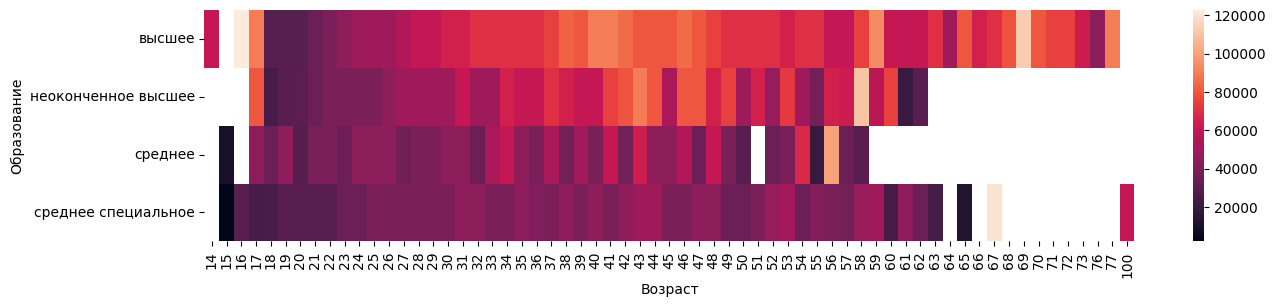

In [34]:
hh_df = hh_data[hh_data['ЗП (руб)']<1e6];
hh_df = pd.pivot_table( hh_df, values=['ЗП (руб)'], columns=['Возраст'],index=['Образование'], aggfunc=np.nanmedian, dropna=True);
display(hh_df)
#hh_df = hh_df.fillna(hh_df.median())
fig = plt.figure(figsize=(15, 3));

p = sns.heatmap(hh_df, annot=False,xticklabels=np.sort(hh_data['Возраст'].unique()));
#p.set_zticklabels(['{:,.0f}'.format(x) for x in p.get_zticks()]);,cbar_kws= ['{:,.0f}'.format(x) for x in p.cbar_kws()]
#p.set_xlabels([0, 1,2,3,4,5,6,7])
p.set_xlabel('Возраст')
fig.get_axes()


plt.show()

In [35]:
mask1= hh_data['Возраст']==14
mask2= hh_data['Возраст']==100
hh_data[mask1|mask2]

,Ищет работу на должность:,Последнее/нынешнее место работы,Последняя/нынешняя должность,Обновление резюме,Авто,Образование,Пол,Возраст,Опыт работы (месяц),Город,...,частичная занятость,проектная работа,волонтерство,стажировка,полный день,сменный график,гибкий график,удаленная работа,вахтовый метод,ЗП (руб)
29098,Ведущий инженер-программист,"КБ Аметист, Концерн АГАТ",Ведущий инженер-программист,2019-04-26,Не указано,высшее,М,14,477.0,Москва,...,False,False,False,False,True,False,False,False,False,60000.0
33654,Frontend-разработчик,Freelance,Frontend-разработчик,2019-04-19,Не указано,среднее специальное,М,100,30.0,Санкт-Петербург,...,True,True,False,True,True,False,True,True,False,60000.0


На тепловой карте присуствуют пустоты на тех местах, где желаемая зароботная плата не была указана. Также есть два подозрительных момента - столетний кандидат и 14 летний с высшим образованием и даже некоторым опытом работы. Также есть 16 летниц кандидат с высшим образованием и максимальными запросами по заработной плате. 

В общем можно наблюдать, что в среднем наибольшие ожидания от заработной плате у людей 40-45 лет с высшим образованием. 
Самые скромные запросы у молодых людей примерно 20летнего возраста. 

Запросы людей с высшим образованием растут с возрастом примерно лет до 50. Для людей с неоконченным высшим образованием наблюдается подобный рост, но более плавный.
Однако у людей со средним и специальным средним образованием запросы с возрастом почти не меняются.  

8. Постройте **диаграмму рассеяния**, показывающую зависимость опыта работы (**"Опыт работы (месяц)"**) от возраста (**"Возраст"**). Опыт работы переведите из месяцев в года, чтобы признаки были в едином масштабе. Постройте на графике дополнительно прямую, проходящую через точки (0, 0) и (100, 100). Данная прямая соответствует значениям, когда опыт работы равен возрасту человека. Точки, лежащие на этой прямой и выше нее - аномалии в наших данных (опыт работы больше либо равен возрасту соискателя)

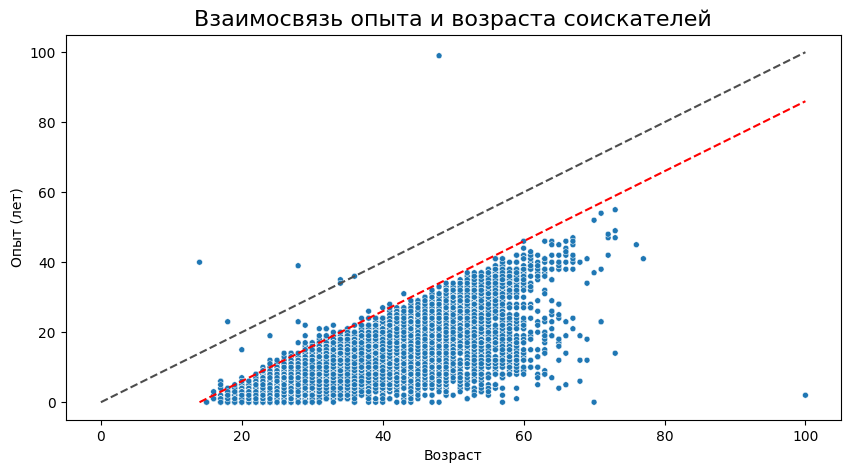

In [36]:
hh_df = hh_data[hh_data['ЗП (руб)']<1e6];
hh_df = hh_df.dropna(subset=['Опыт работы (месяц)'])
hh_df['Опыт (лет)'] = hh_df['Опыт работы (месяц)'].apply( lambda x: round(x/12))
#hh_df = hh_df[hh_df['Опыт (лет)']<90];
#hh_df = hh_df[hh_df['Возраст']<100];

fig = plt.figure(figsize=(10, 5))

scatterplot = sns.scatterplot(
    data=hh_df,
    y='Опыт (лет)',
    x='Возраст',
    size=1,
    #hue='Пол',
    #hue='Образование',
    #hue='Город',
)
# Проводим прямую опыт работы равен возрасту человека 
scatterplot.plot([0,100], [0,100], ls="--", c=".3")
# Сдвигаем прямую, предпологая, что опыт работы можно начать набирать тольо с Z лет 
Z=14;
scatterplot.plot([Z,100], [0,100-Z], ls="--", c="r")
scatterplot.set_title('Взаимосвязь опыта и возраста соискателей', fontsize=16)
scatterplot.set_ylabel('Опыт (лет)')
scatterplot.set_xlabel('Возраст');
scatterplot.legend().remove()

На графике представленна зависимость опыта работы от возраста соискателя. 

Диагональная прямая Опыт = Возраст, обозначенная черным пунктиром, помогает выявить аномалии, в которых опыт человека превышает его возраст. 
Можно ужесточить правило для выявления подобных аномалий, задав вораст, с которого человек теоретически способен начать работать - например 14 лет, как сделано для прямой, проведенной красным пунктиром. 



**Дополнительные баллы**

Для получения 2 дополнительных баллов по разведывательному анализу постройте еще два любых содержательных графика или диаграммы, которые помогут проиллюстрировать влияние признаков/взаимосвязь между признаками/распределения признаков. Приведите выводы по ним. Желательно, чтобы в анализе участвовали признаки, которые мы создавали ранее в разделе "Преобразование данных".


In [37]:
# Посмотрим, какие признаки есть в нашей итоговой таблице
hh_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44744 entries, 0 to 44743
Data columns (total 23 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Ищет работу на должность:        44744 non-null  object 
 1   Последнее/нынешнее место работы  44743 non-null  object 
 2   Последняя/нынешняя должность     44742 non-null  object 
 3   Обновление резюме                44744 non-null  object 
 4   Авто                             44744 non-null  object 
 5   Образование                      44744 non-null  object 
 6   Пол                              44744 non-null  object 
 7   Возраст                          44744 non-null  int64  
 8   Опыт работы (месяц)              44574 non-null  float64
 9   Город                            44744 non-null  object 
 10  Готовность к переезду            44744 non-null  bool   
 11  Готовность к командировкам       44744 non-null  bool   
 12  полная занятость  

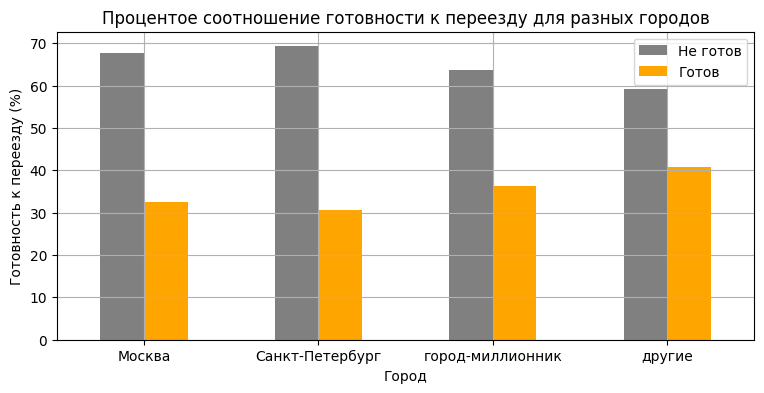

In [168]:
# Сравним процентое отношение людей, готовых к переезду для разных городов.
# Для диаграммы будем использовать только данные о резюме, где желая заработная плата меньше 1 млн рублей.
hh_df = hh_data[hh_data['ЗП (руб)']<1e6];
# Создаем маски 
maskT=hh_df['Готовность к переезду']==True
maskF=hh_df['Готовность к переезду']==False
# Применяем маски , группируем по городам и переводим в проценты
df = pd.DataFrame({
    'Не готов': hh_df[maskF].groupby('Город')['Готовность к переезду'].count()/hh_df.groupby('Город')['Готовность к переезду'].count()*100,
    'Готов': hh_df[maskT].groupby('Город')['Готовность к переезду'].count()/hh_df.groupby('Город')['Готовность к переезду'].count()*100
});

# Строим диаграмму
p = df.plot.bar(rot=0,
        figsize=[9,4],
        color=['Grey','Orange'],
        ylabel='Готовность к переезду (%)',
        grid='on',
        );
p.set_title('Процентое соотношение готовности к переезду для разных городов');

Можно сделать дополнительный вывод дла задания №6, что люди предпочитают оставаться по месту жительства вне зависимости от города. 
Наименее готовы переезжать жители Петербурга - только 30% людей, в Москве чуть больше. 
Самые мобильные люди - из городов-не-миллионников, но все равно сильно меньше половины - 40%.

Также интересно проверить, верно ли, что в среднем женщины готовы работать за меньшую зароботную плату при прочих равных. 

ЗП (руб)              
Пол                             Ж             М
Образование                                    
высшее               64947.864099  87846.678427
неоконченное высшее  45083.699940  64396.620559
среднее              39456.950127  56152.226400
среднее специальное  34355.659916  46479.306852

В среднем женщины запрашивают 28% от заработной платы, запрашиваемой мужчинами.


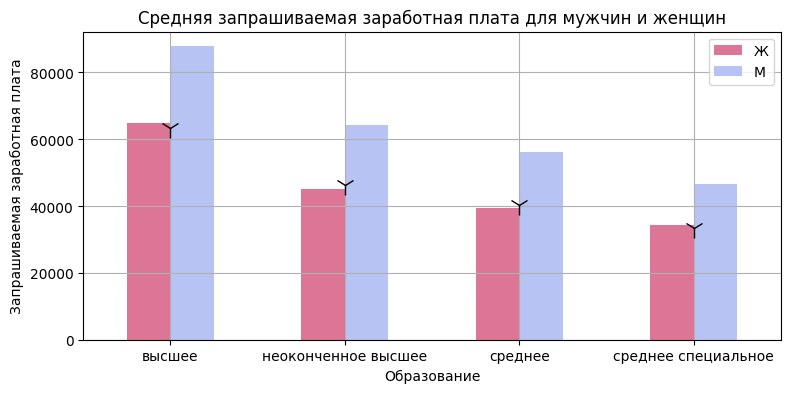

In [154]:
# Для диаграммы будем использовать только данные о резюме, где желая заработная плата меньше 1 млн рублей.
hh_df = hh_data[hh_data['ЗП (руб)']<1e6];

# Создаем сводную таблицу интересующих нас значений 
hh_df = pd.pivot_table( hh_df, values=['ЗП (руб)'], columns=['Пол'],index=['Образование'], aggfunc=np.mean, dropna=True);
display(hh_df)

# Переводим в проценты отношение женских зарплат к мужским, считаем среднее и выводим результат
x = hh_df.div(hh_df['ЗП (руб)']['М'],axis=0)['ЗП (руб)']['Ж'].mean();
print('В среднем женщины запрашивают {}% от заработной платы, запрашиваемой мужчинами.'.format( round( (1 - x) * 100) ));

# Строим диаграмму
p = hh_df.plot.bar(rot=0,
        figsize=[9,4],
        color=['#DD7596', '#B7C3F3'],
        ylabel='Запрашиваемая заработная плата',
        grid='on',
        );
p.set_title('Средняя запрашиваемая заработная плата для мужчин и женщин');
p.legend(['Ж','М']);

# Отмечаем точками значение Х% от мужской зарплаты.
p.plot(hh_df['ЗП (руб)']['М']*x, ls=" ", marker='1', markersize=14, c="k");

Получается, что да, вне зависимости от образования, в среднем женщины оценивают свой труд на почти 30% дешевле, чем мужчины.

# Очистка данных

1. Начнем с дубликатов в наших данных. Найдите **полные дубликаты** в таблице с резюме и удалите их. 

In [ ]:
# ваш код здесь

2. Займемся пропусками. Выведите информацию **о числе пропусков** в столбцах. 

In [ ]:
# ваш код здесь

3. Итак, у нас есть пропуски в 3ех столбцах: **"Опыт работы (месяц)"**, **"Последнее/нынешнее место работы"**, **"Последняя/нынешняя должность"**. Поступим следующим образом: удалите строки, где есть пропуск в столбцах с местом работы и должностью. Пропуски в столбце с опытом работы заполните **медианным** значением.

In [ ]:
# ваш код здесь

4. Мы добрались до ликвидации выбросов. Сначала очистим данные вручную. Удалите резюме, в которых указана заработная плата либо выше 1 млн. рублей, либо ниже 1 тыс. рублей.

In [ ]:
# ваш код здесь

5. В процессе разведывательного анализа мы обнаружили резюме, в которых **опыт работы в годах превышал возраст соискателя**. Найдите такие резюме и удалите их из данных


In [ ]:
# ваш код здесь

6. В результате анализа мы обнаружили потенциальные выбросы в признаке **"Возраст"**. Это оказались резюме людей чересчур преклонного возраста для поиска работы. Попробуйте построить распределение признака в **логарифмическом масштабе**. Добавьте к графику линии, отображающие **среднее и границы интервала метода трех сигм**. Напомним, сделать это можно с помощью метода axvline. Например, для построение линии среднего будет иметь вид:

`histplot.axvline(log_age.mean(), color='k', lw=2)`

В какую сторону асимметрично логарифмическое распределение? Напишите об этом в комментарии к графику.
Найдите выбросы с помощью метода z-отклонения и удалите их из данных, используйте логарифмический масштаб. Давайте сделаем послабление на **1 сигму** (возьмите 4 сигмы) в **правую сторону**.

Выведите таблицу с полученными выбросами и оцените, с каким возрастом соискатели попадают под категорию выбросов?

In [ ]:
# ваш код здесь

ваш коммментарий здесь